# ===============One way Anova Analysis=================

### Analysing  Business Startup Costs

### IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

### FETCHING EXCEL FILE IN JUPYTOR ENVIRONMENT

In [167]:
data=pd.read_excel("Business Startup Costs.xlsx")

In [194]:
data

,SC_PIZZA,SC_BAKER_DONUTS,SC_SHOE_STORES,SC_GIFT_SHOPS,SC_PET_STORES
0,80.0,150.0,48.0,100.0,25
1,125.0,40.0,35.0,96.0,80
2,35.0,120.0,95.0,35.0,30
3,58.0,75.0,45.0,99.0,35
4,110.0,160.0,75.0,75.0,30
5,140.0,60.0,115.0,150.0,28
6,97.0,45.0,42.0,45.0,20
7,50.0,100.0,78.0,100.0,75
8,65.0,86.0,65.0,120.0,48
9,79.0,87.0,125.0,50.0,20


### RESHAPE DATASET AS REQUIRED STATSMODEL PACKAGE

In [76]:
data_melt=pd.melt(data.reset_index(),id_vars=['index'],value_vars=["SC_PIZZA","SC_BAKER_DONUTS","SC_SHOE_STORES","SC_GIFT_SHOPS","SC_PET_STORES"])

### CHECK TOP5 DATA WITH VALUES

In [77]:
data_melt.head()

,index,variable,value
0,0,SC_PIZZA,80.0
1,1,SC_PIZZA,125.0
2,2,SC_PIZZA,35.0
3,3,SC_PIZZA,58.0
4,4,SC_PIZZA,110.0


### RENAME COLUMNS NAME

In [78]:
data_melt.columns=['index','startups','cost_value(yi)']
data_melt.head()

,index,startups,cost_value(yi)
0,0,SC_PIZZA,80.0
1,1,SC_PIZZA,125.0
2,2,SC_PIZZA,35.0
3,3,SC_PIZZA,58.0
4,4,SC_PIZZA,110.0


C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


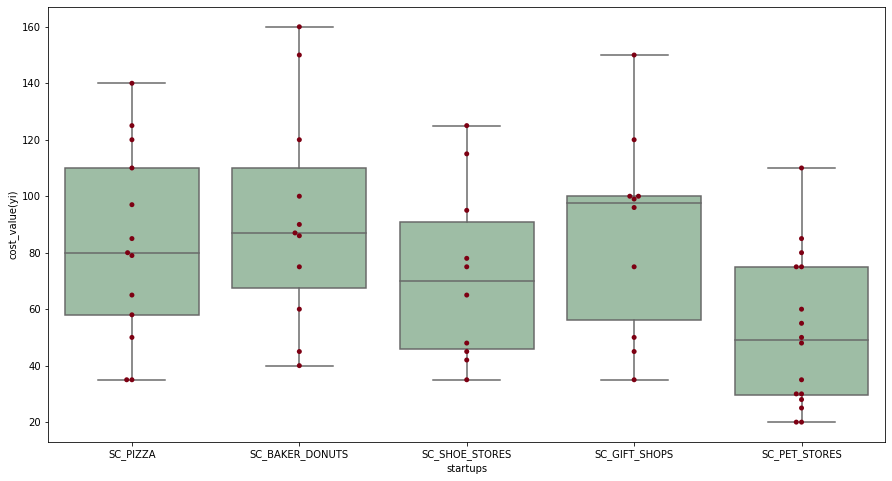

In [186]:
import matplotlib.pyplot as plt
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.boxplot(x = "startups", y = "cost_value(yi)", ax=ax, data=data_melt,color='#99c2a2')
sn.swarmplot(x="startups", y="cost_value(yi)",ax=ax ,data=data_melt, color='#7d0013')

### Boxplot Structure

1)Bottom black horizontal line of green box plot is minimum value.

2)First black horizontal line of rectangle shape of green box plot is First quartile [Q1] or 25%

3)Second black horizontal line of rectangle shape of green box plot is Second quartile [Q2]o r 50% or median

4)Third black horizontal line of rectangle shape of green box plot is third quartile [Q3] or 75%

5)Top black horizontal line of rectangle shape of green box plot is maximum value.

6)Values which are above Top Black Horizontal line of rectangle shape of green box are Outliers

Observations :

SC_PIZZA:You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1

SC_BAKER_DONUTS: You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1

SC_SHOE_STORES :You’ll notice here that the distance between Q1 and Q2 and Q2 and Q3 is almost equal i.e.: Q3-Q2=Q2-Q1

SC_GIFT_SHOPS :You can see that Q2 is present nearer to Q3. This represents a negative skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 < Q2-Q1

SC_PET_STORES : You can see that Q2 is present nearer to Q1. This represents a positively skewed distribution. In terms of quartiles, it can be given by:Q3-Q2 > Q2-Q1

In [191]:
print("MEAN :",data.mean())
print("Median :",data.median())
#print("Mode :",df.mode().T)
print("difference :",data.mean()-data.median())

MEAN : SC_PIZZA           83.000000
SC_BAKER_DONUTS    92.090909
SC_SHOE_STORES     72.300000
SC_GIFT_SHOPS      87.000000
SC_PET_STORES      51.625000
dtype: float64
Median : SC_PIZZA           80.0
SC_BAKER_DONUTS    87.0
SC_SHOE_STORES     70.0
SC_GIFT_SHOPS      97.5
SC_PET_STORES      49.0
dtype: float64
difference : SC_PIZZA            3.000000
SC_BAKER_DONUTS     5.090909
SC_SHOE_STORES      2.300000
SC_GIFT_SHOPS     -10.500000
SC_PET_STORES       2.625000
dtype: float64


As we notice mean > median in all startups except SC_GIFT_SHOPS  ,its tells that the value of skweness for skewed distribution is greater than Zero. i.e data is +ve Skewed

We can also check Skewness by using Skew() inbuilt function

In [192]:
skewValue = data.skew()
print("skewValue of dataframe attributes: ", skewValue)

skewValue of dataframe attributes:  SC_PIZZA           0.132972
SC_BAKER_DONUTS    0.509844
SC_SHOE_STORES     0.546078
SC_GIFT_SHOPS      0.077294
SC_PET_STORES      0.633106
dtype: float64


Since our data is positively skewed here, it means that it has a higher number of data points having low values

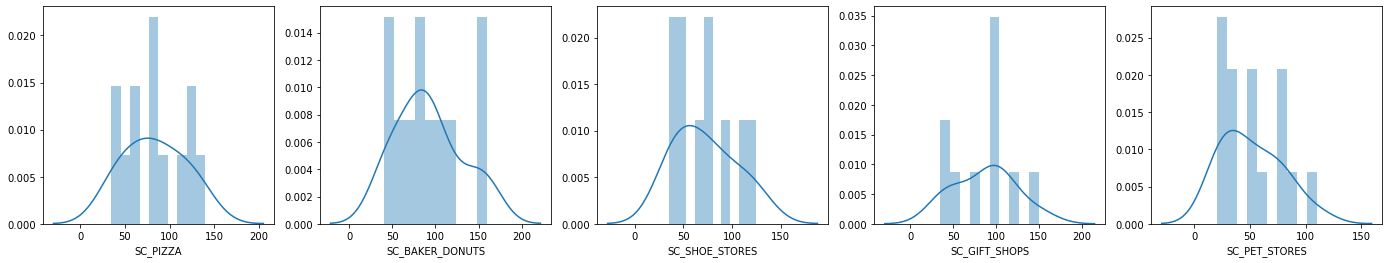

In [193]:
f,ax=plt.subplots(1,5,figsize=(24,4))
vis1=sn.distplot(data['SC_PIZZA'],bins=10,ax=ax[0])
vis2=sn.distplot(data['SC_BAKER_DONUTS'],bins=10,ax=ax[1])
vis3=sn.distplot(data['SC_SHOE_STORES'],bins=10,ax=ax[2])
vis4=sn.distplot(data['SC_GIFT_SHOPS'],bins=10,ax=ax[3])
vis5=sn.distplot(data['SC_PET_STORES'],bins=10,ax=ax[4])

### STEPS INVOLVE IN MANUAL CALCULATION OF ONE WAY ANOVA

### Sum of Squares Total

SST=$\sum \limits _{i=1} ^{n} (y_{i} - \hat{y})^{2} $

To get there, we first compute the overall mean

In [79]:
Over_All_Mean=data_melt['cost_value(yi)'].mean()
print('OverAll Mean(y_bar) :',round(Over_All_Mean,2))

OverAll Mean(y_bar) : 75.18


And now compute the sum of the squared differences between the original scores and the overall mean: SUM OF SQUARE TOTAL

In [80]:
data_melt['Over_All_Mean(y_bar)']=Over_All_Mean
data_melt.head(50)

data_melt_1=data_melt.dropna()
data_melt_1
SST=sum((data_melt_1['cost_value(yi)'] - data_melt_1['Over_All_Mean(y_bar)'])**2)
print("SUM OF SQUARES TOTAL(SST)",round(SST,2))

SUM OF SQUARES TOTAL(SST) 74858.98


This value can be found in the ANOVA table of statsmodels by taking the sum of the sum_sq column

### Sum of Squares Residual 

The computation for residual Sum of Squares is slightly different because it takes not the overall average, but the three group averages.
We need to subtract each value from the mean of its group (the mean of its own startup) and then square those differences and sum them.

SSE=$\sum \limits _{i=1} ^{n} (y_{i} - \hat{groupmean})^{2} $

### AVERAGE COST VALUE PER STARTUP GIVES FIRST INSIGHT IN WHICH STARTUP LOW COST VALUE

Compute Group Mean

In [81]:
group_means=data_melt_1.groupby('startups').mean()
group_means=group_means.rename(columns={'cost_value(yi)' : 'group_means'}) #renaming cost_value(yi) to group mean
round(group_means,2)

,index,group_means,Over_All_Mean(y_bar)
startups,,,
SC_BAKER_DONUTS,5.0,92.09,75.18
SC_GIFT_SHOPS,4.5,87.00,75.18
SC_PET_STORES,7.5,51.62,75.18
SC_PIZZA,6.0,83.00,75.18
SC_SHOE_STORES,4.5,72.30,75.18


Add group mean and overall mean to the original dataset

In [82]:
data_melt_1=data_melt_1.merge(group_means,left_on='startups',right_index=True)

In [84]:
del data_melt_1['Over_All_Mean(y_bar)_y']
# data_melt_1.drop(['Over_All_Mean(y_bar)_y'])

In [87]:
data_melt_1.head()

,index_x,startups,cost_value(yi),Over_All_Mean(y_bar)_x,index_y,group_means
0,0,SC_PIZZA,80.0,75.183333,6.0,83.0
1,1,SC_PIZZA,125.0,75.183333,6.0,83.0
2,2,SC_PIZZA,35.0,75.183333,6.0,83.0
3,3,SC_PIZZA,58.0,75.183333,6.0,83.0
4,4,SC_PIZZA,110.0,75.183333,6.0,83.0


Compute Sum of Square Residual

In [91]:
SSE=sum((data_melt_1['cost_value(yi)'] - data_melt_1['group_means'])**2)
print('Sum of Square Residual :',round(SSE,2))

Sum of Square Residual : 60560.76


We can find this value in the ANOVA table of statsmodels under sum_sq at the line Residual.

### Sum of Squares Explained

Having computed the total sum of squares and the residual sum of squares, we can now compute the Explained Sum of Squares using:

### SST=SS(EXPLAINED) + SSE 

### So  we can find Sum of Square Explained,

### SS(EXPLAINED)=SST-SSE

Since we already have the SS-Residual(SSE) and SS-Total(SST), we could do a simple subtraction to get SS-Explained. 

To get there the hard way, we take the weighted sum of the squared differences between each group means and the overall mean, as follows:

Compute Sum of Squares Explained

In [94]:
SS_Explained=sum((data_melt_1['Over_All_Mean(y_bar)_x'] - data_melt_1['group_means'])**2)
print("Sum of Square Explained ",round(SS_Explained,2))

Sum of Square Explained  14298.22


The value can be found in the statsmodels table under sum_sq at the line Startups.

### Determine degrees of freedom

df1 = df of the explained part = number of groups — 1

df2 = df of the residual = number of observations — number of groups

In [110]:
df1=5-1
df2=60-5
print('Between Groups df1 :',df1)
print('Within Groups df2 :',df2)
print('Total_df=',df1+df2)

Between Groups df1 : 4
Within Groups df2 : 55
Total_df= 59


### Mean Squares

Compute Mean Square Explained

In [109]:
n_groups=len(set(data_melt_1['startups']))
n_obs=data_melt_1.shape[0]
#Mean_sqaure_Explained=SS_Explained/df1
n_groups
n_obs

60

In [112]:
df_explained=n_groups-1
MS_explained=SS_Explained/df_explained
print('MS_Explained ',round(MS_explained,2))

MS_Explained  3574.56


Compute Mean Square Residual or Error

In [113]:
df_residual=n_obs-n_groups
MS_residual=SSE/df_residual
print('MS_residual ',round(MS_residual,2))

MS_residual  1101.1


### F Statistic

F-STATTISTIC=$(MS_EXPLAINED   /   MS_RESIDUAL)$

In [116]:
Ftest=MS_explained/MS_residual
Ftest

3.2463361801362502

### P-value

In hypothesis testing, the p-value is used to decide whether an alternative hypothesis can be accepted or not

If the p-value is below 0.05, we reject the null hypothesis in favor of the alternative: this means that at least one group mean is significantly different.

We compute the P-Value using the F distribution with df1 and df2 degrees of freedom, in our case an F(2, 18) distribution.

Using probability calculation, we find the p-value as follows:

In [121]:
import scipy.stats 

p_value=1-scipy.stats.f.cdf(Ftest,df_explained,df_residual)
print("P_value : " ,round(p_value,2))

P_value :  0.02


### Interpretation

### The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among Startups(groups or treatment).

### so we reject our null hypothesis.

### Alternate way to do this in one snapshot

In [123]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [159]:
# data_melt_1.head()
data_1=data_melt_1.rename(columns= {'cost_value(yi)' :'cost_value'})
#data1=pd.DataFrame(data)
data_1.head()

,index_x,startups,cost_value,Over_All_Mean(y_bar)_x,index_y,group_means
0,0,SC_PIZZA,80.0,75.183333,6.0,83.0
1,1,SC_PIZZA,125.0,75.183333,6.0,83.0
2,2,SC_PIZZA,35.0,75.183333,6.0,83.0
3,3,SC_PIZZA,58.0,75.183333,6.0,83.0
4,4,SC_PIZZA,110.0,75.183333,6.0,83.0


### Ordinary Least Squares (OLS) model

In [160]:
lm=ols('cost_value~C(startups)',data_1).fit()

In [161]:
Anova_table=sm.stats.anova_lm(lm)
res=lm.resid #residual

In [162]:
print(Anova_table)

               df        sum_sq      mean_sq         F    PR(>F)
C(startups)   4.0  14298.224242  3574.556061  3.246336  0.018391
Residual     55.0  60560.759091  1101.104711       NaN       NaN


Decision Rule: Reject H0 if p-value is less or equal to the level of significance.

Decision: We reject H0 since p-value (0.018391) is less than the level of significance (0.05).

Inference: The mean Cost Value are not equal for at least one of the startup.

# Important Note :

If you have unbalanced (unequal sample size for each group) data, you can perform similar steps as described for one-way ANOVA with balanced design (equal sample size for each group).

###  From One way ANOVA Analysis, we know that treatment or group or independentant variable (startups) differences are statistically significant, but ANOVA does not tell which startups(group) are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

### Import pairwise_tukeyhsd

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [163]:
tukey=pairwise_tukeyhsd(endog=data_1['cost_value'],
                         groups=data_1['startups'],
                        alpha=0.05)
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1         group2     meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------
SC_BAKER_DONUTS  SC_GIFT_SHOPS  -5.0909    0.9 -45.9825 35.8007  False
SC_BAKER_DONUTS  SC_PET_STORES -40.4659 0.0235  -77.122 -3.8098   True
SC_BAKER_DONUTS       SC_PIZZA  -9.0909    0.9 -47.4315 29.2496  False
SC_BAKER_DONUTS SC_SHOE_STORES -19.7909 0.6339 -60.6825 21.1007  False
  SC_GIFT_SHOPS  SC_PET_STORES  -35.375 0.0763 -73.1016  2.3516  False
  SC_GIFT_SHOPS       SC_PIZZA     -4.0    0.9 -43.3653 35.3653  False
  SC_GIFT_SHOPS SC_SHOE_STORES    -14.7 0.8423 -56.5539 27.1539  False
  SC_PET_STORES       SC_PIZZA   31.375 0.0982  -3.5702 66.3202  False
  SC_PET_STORES SC_SHOE_STORES   20.675 0.5333 -17.0516 58.4016  False
       SC_PIZZA SC_SHOE_STORES    -10.7    0.9 -50.0653 28.6653  False
----------------------------------------------------------------------


The pairs with p-value that is less than 0.05 are significantly different from each other

Thus, we would conclude that there is a statistically significant difference between

startups-SC_BAKER_DONUTS and SC_PET_STORES ,rest all are not statisticaly difference between mean of group where p-adj is not less than 5% alpha

Above results from Tukey’s HSD suggests that only startups-SC_BAKER_DONUTS and SC_PET_STORES, all other pairwise comparisons for startups(groups) Accept null hypothesis (p > 0.05) and indicates not statistical significant differences.

#### Note: Tukey's HSD test is conservative and increases the critical value to control the experimentwise type I error rate. If you have a large number of comparisons (say > 10 or 20) to make using Tukey's test, there may be chances that you may not get significant results for all or expected pairs. If you are interested in only specific or few comparisons and you won't find significant differences using Tukey's test, you may split the data for specific comparisons or use the t-test

### Test ANOVA Assumptions

#### QQ-plot

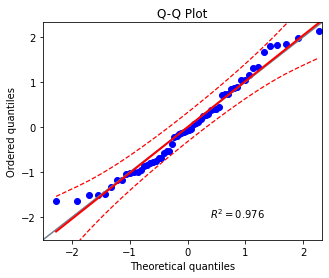

In [164]:
import numpy as np
import pingouin as pg
#np.random.seed(123)
#x = np.random.normal(size=50)
ax = pg.qqplot(res, dist='norm')

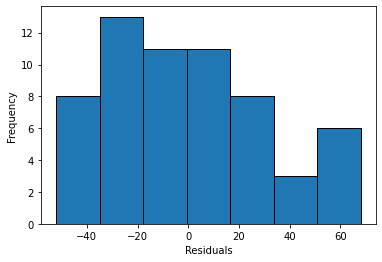

In [149]:
import matplotlib.pyplot as plt
plt.hist(res, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

### Normality Check using Shapiro test

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [165]:
from scipy.stats import shapiro
normal_data=data_1['cost_value']
normal_data
stat,pvalue=shapiro(normal_data)

In [166]:
print("Stat :",round(stat,3),"P-value :", round(pvalue,3))

Stat : 0.961 P-value : 0.052


As the p value is significant, we reject null hypothesis and conclude that data is not drawn from normal distribution.

### Levene’s test 

can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.

In [177]:
datax = [data[col].dropna() for col in data]

In [179]:
from scipy.stats import levene
stat, pvalue = levene(*datax)
print("P-value",round(pvalue,3))

P-value 0.931
